In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle
import os
import sys

In [3]:
# df=wrangle.wrangle()
df = pd.read_csv('initial_pull.csv')

In [3]:
# df.to_csv('sql_pull.csv')

In [4]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
0,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
1,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
3,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
4,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [5]:
df.date_time = pd.to_datetime(df.date_time)
df = df.set_index(df.date_time)
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26 00:00:00,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26 00:00:00,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26 00:00:00,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26 00:00:00,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26 00:00:00,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [6]:
df.index.max(), df.index.min()

(Timestamp('2021-04-21 16:44:39'), Timestamp('2018-01-26 09:55:03'))

In [7]:
df[df.program_id ==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

program_id 3 is full stack java
4 is front end
2 is full stack java??

## Jared and I have agreed to focus on t Java Web Dev and Data Science, skipping php web dev and the front end web dev that has so few observations

In [8]:
df.endpoint.sample(50)

date_time
2020-03-16 09:49:45            javascript-i/introduction/primitive-types
2020-04-08 16:31:59                           jquery/events/mouse-events
2021-02-26 14:14:50                                             java-iii
2021-01-27 09:51:59            javascript-i/introduction/primitive-types
2020-06-16 13:43:47                                                mysql
2018-03-07 16:11:55                                                mysql
2018-11-06 13:47:21                                    javascript-ii/npm
2019-08-19 13:38:35                               mysql/clauses/order-by
2018-07-18 07:55:00                                    javascript-ii/es6
2020-07-23 11:29:13                                        java-iii/jdbc
2020-03-10 09:09:28             1-fundamentals/1.1-intro-to-data-science
2019-12-16 10:36:46               12-distributed-ml/spark-local-mode.svg
2020-05-04 09:47:20    appendix/professional-development/mock-behavio...
2019-02-25 22:24:03                     j

In [9]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']

In [10]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 15)
(21582, 15)
(32015, 15)
(14715, 15)
(8562, 15)


In [11]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


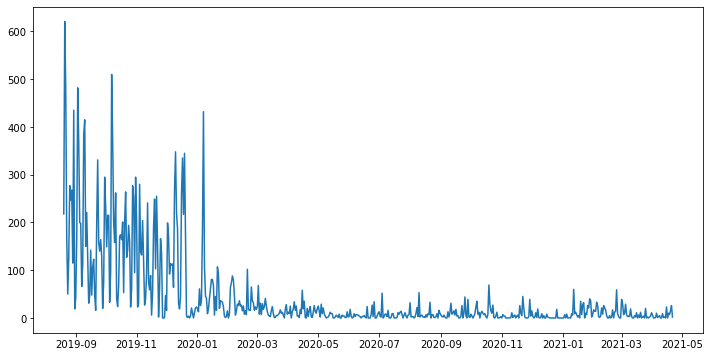

In [12]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [13]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [14]:
df.groupby(by=['program','endpoint']).agg('count').user_id

program       endpoint                        
data_science  %20https://github.com/RaulCPena        1
              ,%20https://github.com/RaulCPena       1
              .gitignore                             1
              /                                   8358
              1-fundamentals                        10
                                                  ... 
php_web_dev   web-design/ui/color                   27
              web-design/ui/typography              29
              web-design/ui/visuals                 26
              web-design/ux/layout                  29
              web-design/ux/purpose                 29
Name: user_id, Length: 3309, dtype: int64

In [15]:
# temp = df[df.endpoint != '/']

In [16]:
# temp.groupby(by=['program']).endpoint.value_counts()

In [17]:
# temp.endpoint.value_counts().head(10)

In [18]:
df.endpoint.str.endswith('/')

date_time
2018-01-26 09:55:03     True
2018-01-26 09:56:02    False
2018-01-26 09:56:05    False
2018-01-26 09:56:06    False
2018-01-26 10:40:15    False
                       ...  
2021-04-21 09:09:42    False
2021-04-21 09:29:08    False
2021-04-21 10:05:39    False
2021-04-21 11:01:19    False
2021-04-21 11:01:23    False
Name: endpoint, Length: 847330, dtype: object

In [19]:
temp = df.copy()
temp['drop_me'] = temp.endpoint.str.contains('.jpg|.svg|.json|.jpeg', regex=True) | temp.endpoint.str.endswith('/')
temp.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev,True
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev,False
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev,False


In [20]:
# temp[temp.drop_me == False].endpoint.value_counts()
temp = temp[temp.drop_me == False]

In [21]:
temp[temp.program=='php_web_dev'].index, temp[temp.program=='java_web_dev'].index

(DatetimeIndex(['2018-01-26 09:56:02', '2018-01-26 09:56:05',
                '2018-01-26 09:56:06', '2018-01-26 10:40:15',
                '2018-01-26 11:26:13', '2018-01-27 07:49:25',
                '2018-01-29 11:41:51', '2018-01-29 11:43:08',
                '2018-01-29 15:06:28', '2018-01-29 15:07:31',
                ...
                '2020-08-10 15:59:29', '2020-08-10 15:59:44',
                '2020-08-10 15:59:48', '2020-08-10 15:59:58',
                '2020-08-10 16:00:00', '2020-08-10 16:01:36',
                '2020-08-10 16:02:08', '2020-08-11 09:36:13',
                '2020-08-11 09:37:04', '2020-08-11 09:46:33'],
               dtype='datetime64[ns]', name='date_time', length=28529, freq=None),
 DatetimeIndex(['2018-12-08 18:25:15', '2018-12-08 18:25:20',
                '2018-12-14 08:29:03', '2018-12-14 08:29:04',
                '2018-12-17 10:05:26', '2018-12-17 10:05:28',
                '2018-12-17 17:37:07', '2018-12-17 17:37:12',
                '2018-12-18 

In [22]:
temp.endpoint.value_counts()

javascript-i                         18203
toc                                  17591
java-iii                             13166
html-css                             13127
java-ii                              12177
                                     ...  
statistics-assessment                    1
prework/fundamentals/loop                1
wp-login                                 1
cli-03-file-paths                        1
javascript-ii/promisesdfghjkjhgfs        1
Name: endpoint, Length: 2147, dtype: int64

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [23]:
temp.program.value_counts().index

Index(['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev'], dtype='object')

In [24]:
programs = ['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev']
for x in programs:
    print(f'The top ten endoints for {x} are {temp[temp.program == x].endpoint.value_counts().head(10)}')



# temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

The top ten endoints for java_web_dev are javascript-i     17457
toc              17428
java-iii         12683
html-css         12569
java-ii          11719
spring           11376
jquery           10693
mysql            10318
java-i           10016
javascript-ii     9861
Name: endpoint, dtype: int64
The top ten endoints for data_science are classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64
The top ten endoints for php_web_dev are index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii 

- is there a difference between javascript-i and java-i? maybe renamed at some point?
- 

In [25]:
temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [26]:
temp.head(1)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False


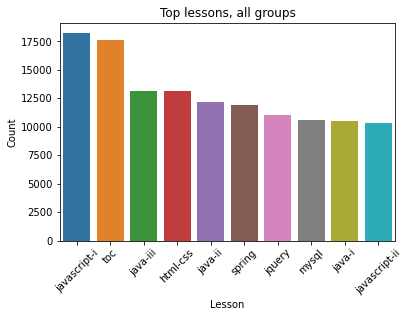

In [27]:
# Top 5 lessons for all Groups
top_lessons = pd.DataFrame(temp.endpoint.value_counts().head(10))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_lessons,
y="endpoint", x=top_lessons.index)
plt.title('Top lessons, all groups')
plt.xlabel('Lesson')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

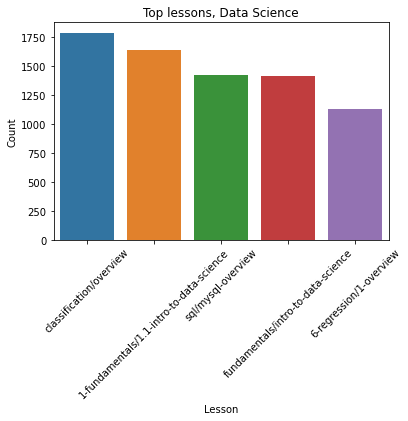

In [28]:
# Top lessons for PHP Web Dev
top_lessons = pd.DataFrame(temp[temp.program == 'data_science'].endpoint.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_lessons,
y="endpoint", x=top_lessons.index)#, hue='cohort_name')
plt.title('Top lessons, Data Science')
plt.xlabel('Lesson')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
ds_df = temp[temp.program == 'data_science']
ds_df.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2020-12-08 10:58:31,2020-12-08 10:58:31,2020-12-08,10:58:31,fundamentals/intro-to-data-science,143,133.0,68.201.242.151,Easley,2020-12-07,2021-06-08,3,2,2020-12-08 10:58:31,-182 days,data_science,False
2020-12-08 15:13:06,2020-12-08 15:13:06,2020-12-08,15:13:06,fundamentals/data-science-pipeline,143,133.0,68.201.242.151,Easley,2020-12-07,2021-06-08,3,2,2020-12-08 15:13:06,-182 days,data_science,False


In [30]:
ds_df.endpoint.value_counts().head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64

In [31]:
# plot_order = ds_df.groupby('endpoint')['Deaths'].sum().sort_values(ascending=False).index.values
# plt.figure(figsize=(20,10))
# sns.countplot(data=ds_df, x='endpoint',hue='cohort_name')

In [32]:
ds_graph_set = ds_df[ds_df.endpoint.isin(['classification/overview', '1-fundamentals/1.1-intro-to-data-science',
       'sql/mysql-overview', 'fundamentals/intro-to-data-science',
       '6-regression/1-overview', 'anomaly-detection/overview',
       '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview',
       'stats/compare-means', 'python/data-types-and-variables'])]
# ds_graph_set

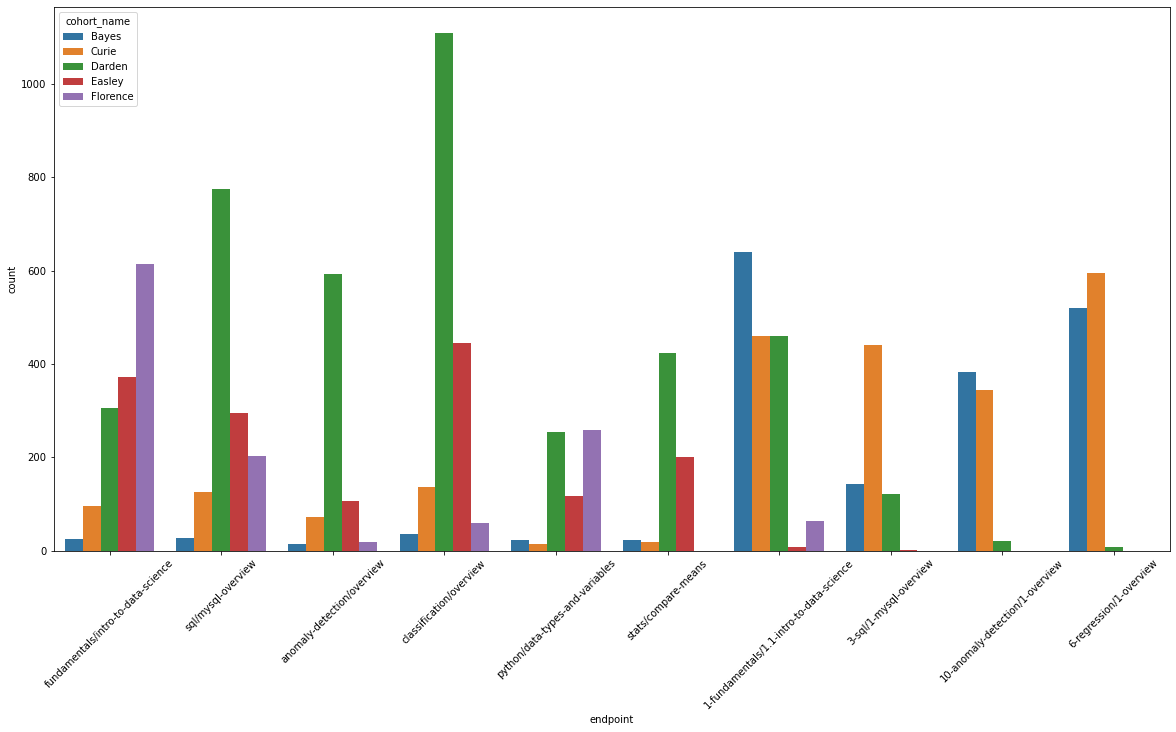

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds_graph_set, x='endpoint',hue='cohort_name',hue_order=['Bayes','Curie','Darden','Easley','Florence'])
plt.xticks(rotation=45);

- I'm starting to get the impression that the differences have more to do with the organization of the curriculum (i.e. the initial landing page of a given module migh have changed here and there, throwing off the number of page visits for that lesson)

In [34]:
java_wd_df = temp[temp.program == 'java_web_dev']
java_wd_df.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-12-08 18:25:15,2018-12-08 18:25:15,2018-12-08,18:25:15,mysql,1,28.0,72.177.229.125,Staff,2014-02-04,2014-02-04,2,2,2018-12-08 18:25:15,1768 days,java_web_dev,False
2018-12-08 18:25:20,2018-12-08 18:25:20,2018-12-08,18:25:20,mysql/clauses,1,28.0,72.177.229.125,Staff,2014-02-04,2014-02-04,2,2,2018-12-08 18:25:20,1768 days,java_web_dev,False


In [35]:
java_wd_df.endpoint.value_counts().head(10).index

Index(['javascript-i', 'toc', 'java-iii', 'html-css', 'java-ii', 'spring',
       'jquery', 'mysql', 'java-i', 'javascript-ii'],
      dtype='object')

In [36]:
java_wd_graph_set = java_wd_df[java_wd_df.endpoint.isin(['javascript-i', 'toc', 'java-iii', 'html-css', 'java-ii', 'spring',
       'jquery', 'mysql', 'java-i', 'javascript-ii'])]
java_wd_graph_set = java_wd_graph_set[java_wd_graph_set.cohort_name != 'Staff']
java_wd_graph_set.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-29 22:34:31,2018-01-29 22:34:31,2018-01-29,22:34:31,javascript-i,2,22.0,67.11.104.47,Teddy,2018-01-08,2018-05-17,2,1,2018-01-29 22:34:31,-108 days,java_web_dev,False
2018-01-30 14:59:09,2018-01-30 14:59:09,2018-01-30,14:59:09,jquery,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:09,-107 days,java_web_dev,False
2018-01-30 14:59:20,2018-01-30 14:59:20,2018-01-30,14:59:20,javascript-ii,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:20,-107 days,java_web_dev,False
2018-01-30 14:59:30,2018-01-30 14:59:30,2018-01-30,14:59:30,java-i,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:30,-107 days,java_web_dev,False
2018-01-30 15:00:05,2018-01-30 15:00:05,2018-01-30,15:00:05,javascript-i,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 15:00:05,-107 days,java_web_dev,False


In [37]:
java_wd_graph_set.cohort_name.sort_values().unique()

array(['Andromeda', 'Apex', 'Bash', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion'], dtype=object)

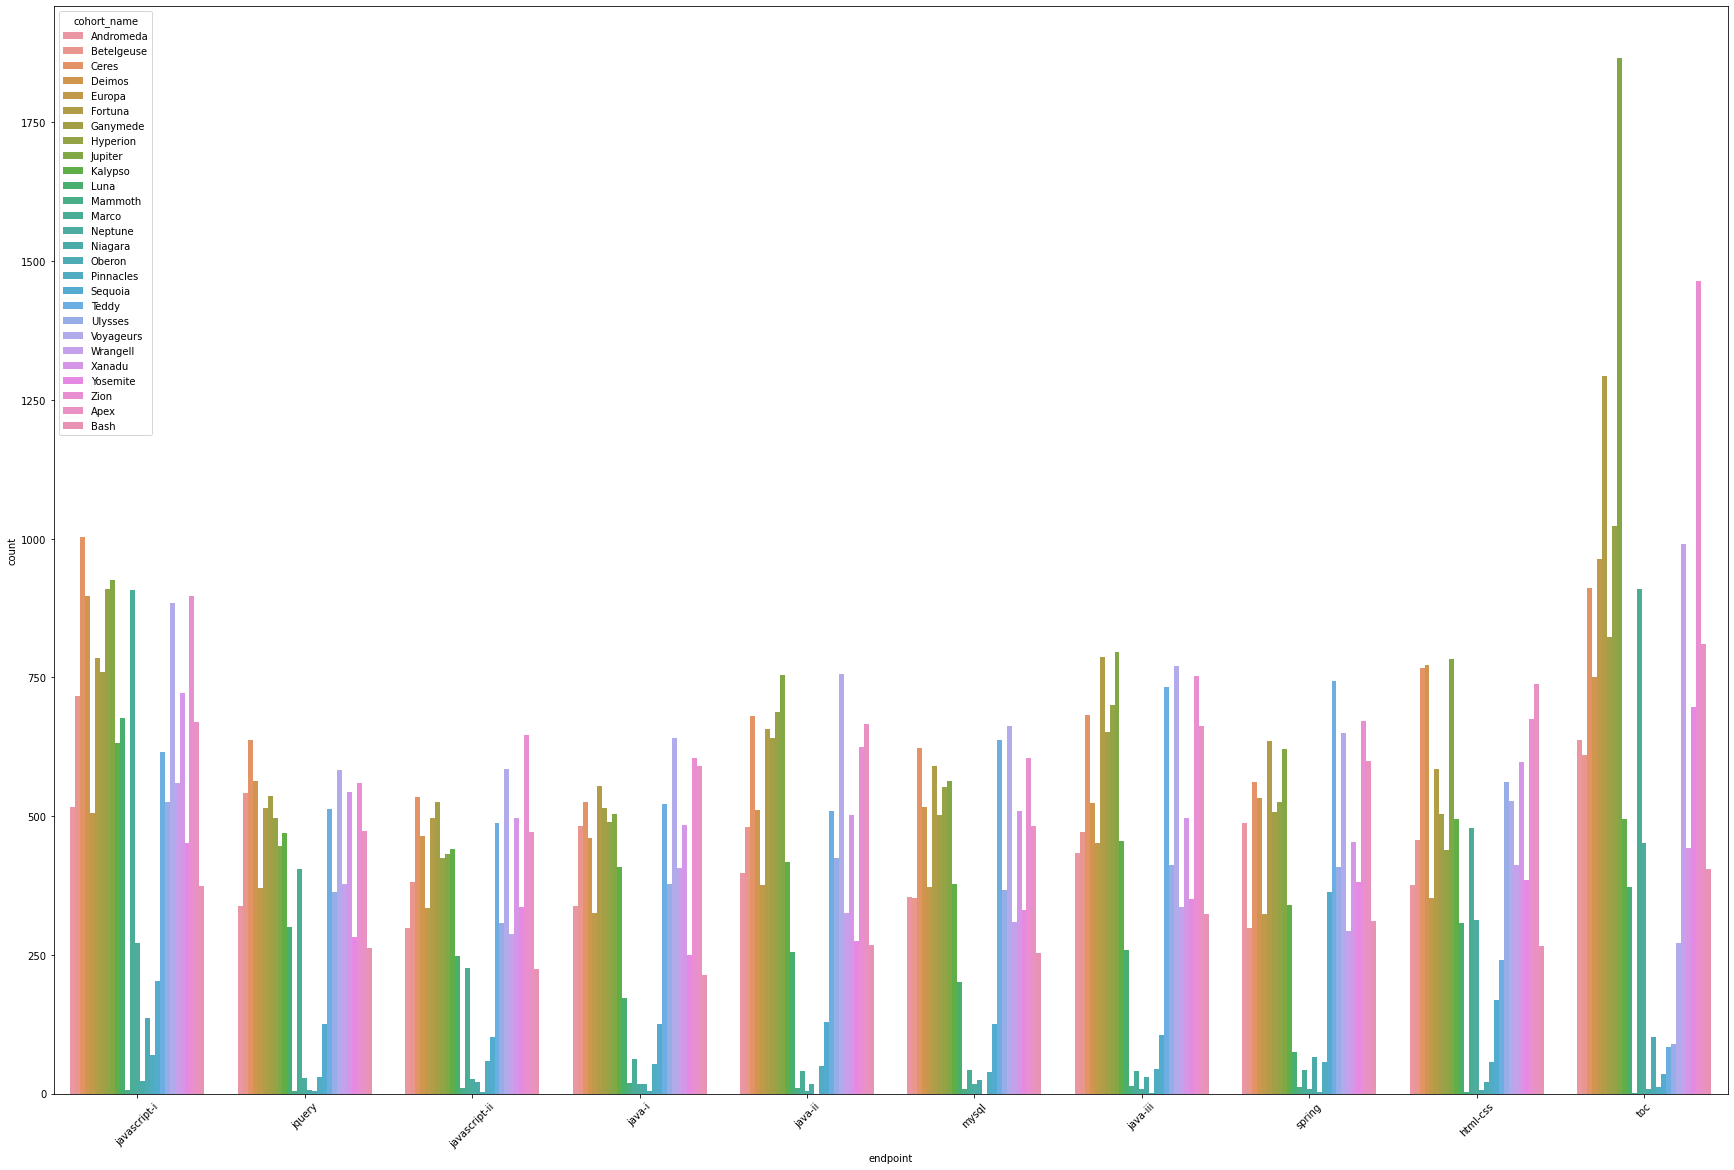

In [38]:
plt.figure(figsize=(30,20))
sns.countplot(data=java_wd_graph_set, x='endpoint',hue='cohort_name', hue_order = ['Andromeda', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion', 'Apex', 'Bash'])
plt.xticks(rotation=45);

- I'm starting to get the impression that the differences have more to do with the organization of the curriculum (i.e. the initial landing page of a given module migh have changed here and there, throwing off the number of page visits for that lesson)

- The cohorts are organized alphabetically (and therefore chronologically).  There is a clear drop-off in lesson views for a few cohorts in the upper-middle
- javascript-i and toc are the most commonly accessed lessons, with a few obvious outliers for toc

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [39]:
temp.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False


In [84]:
temp.groupby('user_id').agg('mean')


,cohort_id_x,program_id,number_of_classes,drop_me,is_active
user_id,,,,,
1,23.313879,1.765694,2.0,0.0,0.000000
2,22.000000,2.000000,1.0,0.0,1.000000
3,22.000000,2.000000,1.0,0.0,0.969595
4,22.000000,2.000000,1.0,0.0,1.000000
5,22.000000,2.000000,1.0,0.0,0.953205
...,...,...,...,...,...
976,139.000000,2.000000,1.0,0.0,1.000000
977,139.000000,2.000000,1.0,0.0,1.000000
978,139.000000,2.000000,1.0,0.0,1.000000


In [40]:
temp['is_active']= temp.date_time <= temp.cohort_end
temp.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False,False


In [41]:
is_active = temp[temp.is_active == True]

In [42]:
is_active.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-01-26 09:56:24,2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-26 09:56:24,-111 days,java_web_dev,False,True
2018-01-26 09:56:41,2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-26 09:56:41,-111 days,java_web_dev,False,True


In [79]:
pd.DataFrame(is_active[is_active.program == 'data_science'].groupby(['user_id','endpoint']).count().source_ip)

source_ip
user_id endpoint                                                     
143     anomaly-detection/continuous-probabilistic-methods          1
        anomaly-detection/overview                                  7
        appendix/data_science_community                             1
        appendix/git-teamwork                                       1
        appendix/open_data                                          4
...                                                               ...
949     sql/subqueries                                              4
        sql/tables                                                 12
        sql/temporary-tables                                        8
        sql/where                                                  11
        where                                                       1

[12538 rows x 1 columns]

In [86]:
least_active = is_active.user_id.value_counts().tail(10).index.tolist()
least_active

[572, 941, 697, 812, 388, 539, 956, 679, 278, 832]

In [87]:
is_active[is_active.user_id.isin(least_active)]

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-09-27 14:47:37,2018-09-27 14:47:37,2018-09-27,14:47:37,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2,1,2018-09-27 14:47:37,-14 days,java_web_dev,False,True
2018-09-27 14:58:48,2018-09-27 14:58:48,2018-09-27,14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2,1,2018-09-27 14:58:48,-14 days,java_web_dev,False,True
2018-09-27 14:59:07,2018-09-27 14:59:07,2018-09-27,14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2,1,2018-09-27 14:59:07,-14 days,java_web_dev,False,True
2019-03-19 09:50:23,2019-03-19 09:50:23,2019-03-19,09:50:23,html-css,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 09:50:23,-133 days,java_web_dev,False,True
2019-03-19 09:50:28,2019-03-19 09:50:28,2019-03-19,09:50:28,html-css/elements,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 09:50:28,-133 days,java_web_dev,False,True
2019-03-19 10:04:11,2019-03-19 10:04:11,2019-03-19,10:04:11,html-css/elements,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 10:04:11,-133 days,java_web_dev,False,True
2019-03-19 10:19:32,2019-03-19 10:19:32,2019-03-19,10:19:32,html-css/elements,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 10:19:32,-133 days,java_web_dev,False,True
2019-03-19 11:11:51,2019-03-19 11:11:51,2019-03-19,11:11:51,html-css/forms,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 11:11:51,-133 days,java_web_dev,False,True
2019-03-19 11:12:02,2019-03-19 11:12:02,2019-03-19,11:12:02,html-css/elements,388,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2,1,2019-03-19 11:12:02,-133 days,java_web_dev,False,True


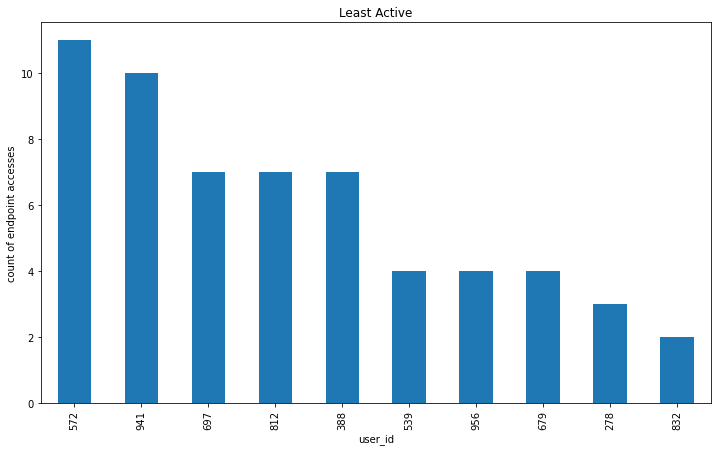

In [88]:
is_active.user_id.value_counts().tail(10).plot.bar(figsize=(12,7))
plt.title('Least Active')
plt.xlabel('user_id')
plt.ylabel('count of endpoint accesses')
plt.show()

In [60]:
# temp.resample('W').count().endpoint.plot(figsize=(16, 8))

In [61]:
# temp[temp.user_id==588].resample('d').count().endpoint.plot(figsize=(16, 8))

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [47]:
temp.head(1)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False


<AxesSubplot:xlabel='date_time'>

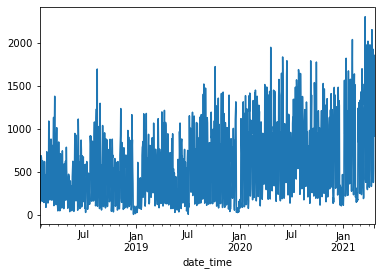

In [48]:
temp.source_ip.resample('D').count().plot()

In [90]:
pages = temp['endpoint'].resample('d').count()

In [92]:
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

date_time
2018-01-26    474.000000
2018-01-27    316.857143
2018-01-28    240.378378
2018-01-29    403.714286
2018-01-30    456.253521
Freq: D, Name: endpoint, dtype: float64

In [95]:
# 14 days EMA
ema_14d = pages.ewm(span=14).mean()
ema_30d = pages.ewm(span=30).mean()
ema_90d = pages.ewm(span=90).mean()


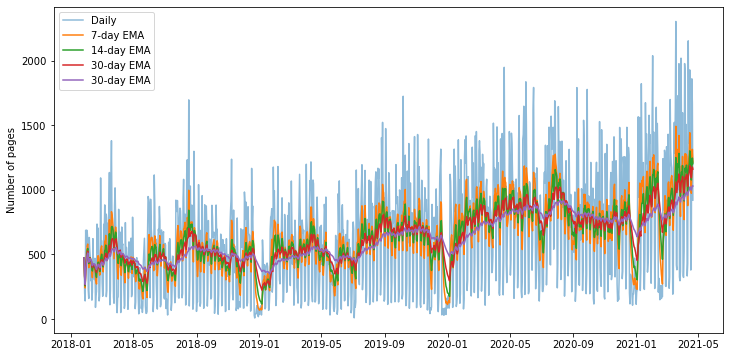

In [96]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


In [102]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()
# compute exponential stdev
stdev = pages.ewm(span=span).std()
ub = midband + stdev*2
lb = midband - stdev*2

In [103]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()


,ub,lb
date_time,,
2018-01-26,NaN,NaN
2018-01-27,720.825396,-56.992063
2018-01-28,615.531125,-88.263446
2018-01-29,900.813310,-140.240021
2018-01-30,897.498777,-53.327016


In [104]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()


,pages,midband,ub,lb
date_time,,,,
2018-01-26,474,474.000000,NaN,NaN
2018-01-27,199,331.916667,720.825396,-56.992063
2018-01-28,140,263.633839,615.531125,-88.263446
2018-01-29,687,380.286644,900.813310,-140.240021
2018-01-30,564,422.085881,897.498777,-53.327016


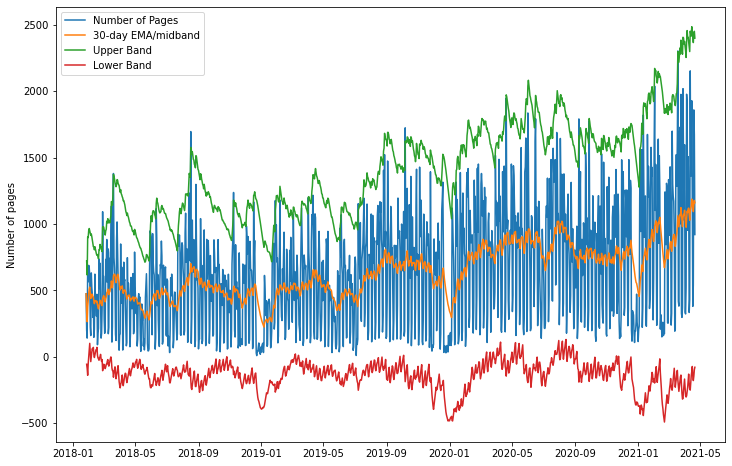

In [105]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


- negative lower band is obviously nonsensical, but due to time constraints i will not correct it for now

In [106]:
# get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure

920.0

In [107]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb

-79.5330561849828

In [108]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub


2399.5221277974842

In [109]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))


%b for last datapoint:  0.4


In [110]:
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()


,pages,midband,ub,lb,pct_b
date_time,,,,,
2018-01-26,474,474.000000,NaN,NaN,NaN
2018-01-27,199,331.916667,720.825396,-56.992063,0.329116
2018-01-28,140,263.633839,615.531125,-88.263446,0.324332
2018-01-29,687,380.286644,900.813310,-140.240021,0.794618
2018-01-30,564,422.085881,897.498777,-53.327016,0.649254


In [111]:
my_df[my_df['pct_b']>1]


,pages,midband,ub,lb,pct_b
date_time,,,,,
2018-02-27,1092,436.235208,977.978203,-105.507786,1.105236
2018-03-20,1380,609.338771,1373.187365,-154.509824,1.004459
2018-05-30,948,341.946711,897.329927,-213.436506,1.045617
2018-07-23,920,383.428639,905.008144,-138.150867,1.014372
2018-08-17,1696,700.995529,1576.130917,-174.139859,1.068486
2018-11-08,1237,522.485541,1179.855243,-134.884161,1.043465
2019-01-28,1176,419.557759,1105.988757,-266.873238,1.050997
2019-07-08,1153,427.485499,1107.826341,-252.855343,1.033199
2019-10-07,1724,717.859755,1623.834128,-188.114618,1.055281


In [112]:
def prep(df, user):
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]


In [113]:
user = 1
span = 30
weight = 2
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)


In [114]:
anomalies

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-02-20,54,6.456745,35.718248,-22.804758,1.312386,1
2018-03-19,35,9.304089,32.368632,-13.760453,1.057044,1
2018-05-04,27,7.179313,24.736171,-10.377545,1.064471,1
2018-05-11,27,8.141119,26.687629,-10.405390,1.008421,1
2018-05-29,68,9.612443,44.787234,-25.562347,1.329963,1
2018-07-25,32,5.833712,24.720784,-13.053359,1.192704,1
2018-07-31,35,7.286941,29.438752,-14.864871,1.125526,1
2018-08-07,34,8.843526,31.764520,-14.077468,1.048765,1
2018-11-07,13,1.221442,8.090149,-5.647265,1.357407,1


In [122]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(temp.user_id.unique()):
    user_df = find_anomalies(temp, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)


In [128]:
anomalies.tail()

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2021-01-24,5,0.384646,4.807526,-4.038233,1.021759,817
2021-02-23,63,7.236942,62.028802,-47.554919,1.008863,851
2021-04-06,17,1.217827,16.184575,-13.748920,1.027241,854
2021-03-25,13,0.860170,12.327327,-10.606987,1.029330,859
2021-03-19,20,1.584389,19.805390,-16.636612,1.005340,860


In [133]:
anomalies.sort_values(by='pages',ascending=False).head(20)

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,270,24.248818,264.684425,-216.186789,1.011054,341
2018-06-02,197,15.986134,187.513379,-155.541110,1.027653,138
2019-12-19,189,18.848786,184.044653,-146.347081,1.014998,526
2020-10-16,175,18.929833,169.184351,-131.324684,1.019353,658
2020-06-05,162,18.990784,159.524191,-121.542623,1.008809,521
2019-02-14,151,9.941103,141.860738,-121.978532,1.034640,223
2020-11-04,141,16.282709,139.088741,-106.523323,1.007782,248
2019-07-12,128,8.373364,120.222644,-103.475915,1.034767,309
2020-01-14,115,8.554252,108.651844,-91.543339,1.031710,423


In [137]:
anomalies.sort_values(by='pages',ascending=False).head(20).user_id.to_list()

[341,
 138,
 526,
 658,
 521,
 223,
 248,
 309,
 423,
 635,
 101,
 344,
 785,
 750,
 341,
 1,
 664,
 153,
 643,
 315]

In [138]:
temp.head(1)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False


In [141]:
temp['is_anomalous'] = temp.user_id.isin([341,
 138,
 526,
 658,
 521,
 223,
 248,
 309,
 423,
 635,
 101,
 344,
 785,
 750,
 341,
 1,
 664,
 153,
 643,
 315]
)

In [142]:
temp.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active,is_anomalous
date_time,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False,True
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False,False,True
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev,False,False,True
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev,False,False,True
2018-01-26 11:26:13,2018-01-26 11:26:13,2018-01-26,11:26:13,java-i,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 11:26:13,720 days,php_web_dev,False,False,True


In [144]:
is_anomalous = temp[temp.is_anomalous == True]
# is_anomalous.head()

In [145]:
is_anomalous.head(1)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active,is_anomalous
date_time,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False,True


In [162]:
is_anomalous.source_ip.unique()

array(['97.105.19.61', '72.177.226.58', '172.56.15.50', '172.56.15.203',
       '172.56.15.6', '172.56.15.15', '97.98.16.4', '97.105.19.58',
       '72.177.229.125', '70.121.207.245', '192.171.117.210',
       '70.121.210.246', '99.203.155.145', '99.203.155.126', '64.9.239.9',
       '70.121.214.34', '99.203.26.250', '97.98.14.0', '70.121.215.53',
       '99.203.154.85', '12.5.63.210', '172.58.102.205', '72.128.136.219',
       '47.234.152.61', '47.234.144.124', '24.243.37.71', '66.69.42.51',
       '66.69.40.223', '70.121.199.82', '72.177.135.99', '172.58.109.111',
       '72.177.141.60', '108.65.244.91', '99.203.155.147',
       '99.203.26.185', '99.203.154.83', '99.203.26.200', '99.203.154.93',
       '12.247.3.50', '99.203.26.254', '170.248.173.245', '12.27.152.137',
       '172.3.29.85', '24.73.246.228', '50.84.103.219', '97.77.238.3',
       '97.77.203.60', '71.41.243.19', '99.203.27.150', '173.123.59.139',
       '64.134.31.44', '38.95.108.230', '99.203.154.173', '74.50.118.217'

In [161]:
import ipaddress

In [159]:
ip_list = []
for i in ['97.105.19.61', '72.177.226.58', '172.56.15.50', '172.56.15.203',
       '172.56.15.6', '172.56.15.15', '97.98.16.4', '97.105.19.58',
       '72.177.229.125', '70.121.207.245', '192.171.117.210',
       '70.121.210.246', '99.203.155.145', '99.203.155.126', '64.9.239.9',
       '70.121.214.34', '99.203.26.250', '97.98.14.0', '70.121.215.53',
       '99.203.154.85', '12.5.63.210', '172.58.102.205', '72.128.136.219',
       '47.234.152.61', '47.234.144.124', '24.243.37.71', '66.69.42.51',
       '66.69.40.223', '70.121.199.82', '72.177.135.99', '172.58.109.111',
       '72.177.141.60', '108.65.244.91', '99.203.155.147',
       '99.203.26.185', '99.203.154.83', '99.203.26.200', '99.203.154.93',
       '12.247.3.50', '99.203.26.254', '170.248.173.245', '12.27.152.137',
       '172.3.29.85', '24.73.246.228', '50.84.103.219', '97.77.238.3',
       '97.77.203.60', '71.41.243.19', '99.203.27.150', '173.123.59.139',
       '64.134.31.44', '38.95.108.230', '99.203.154.173', '74.50.118.217',
       '96.40.234.116', '24.26.246.52', '99.203.155.177',
       '173.255.139.216', '185.151.12.242', '24.26.252.42',
       '185.151.12.218', '72.180.51.14', '209.135.132.136',
       '72.180.46.191', '172.108.140.130', '72.180.0.21', '72.180.53.75',
       '67.79.20.162', '72.190.161.136', '199.116.118.132',
       '199.116.118.166', '172.58.109.109', '172.58.99.14',
       '172.58.99.99', '172.58.99.105', '136.50.20.17', '172.56.6.151',
       '172.58.109.155', '104.187.116.12', '75.15.240.105',
       '130.45.47.106', '71.42.125.202', '173.173.113.96',
       '173.173.115.201', '108.199.116.156', '72.177.174.24',
       '166.251.101.159', '172.56.6.73', '172.58.109.206',
       '166.251.109.168', '166.247.169.116', '24.26.232.177',
       '107.77.218.198', '107.77.221.57', '66.69.86.155', '107.77.217.20',
       '107.77.219.96', '107.77.218.215', '107.77.222.13']:
    i = i.replace("'","")
    ip_list.append(i)
ip_list

['97.105.19.61',
 '72.177.226.58',
 '172.56.15.50',
 '172.56.15.203',
 '172.56.15.6',
 '172.56.15.15',
 '97.98.16.4',
 '97.105.19.58',
 '72.177.229.125',
 '70.121.207.245',
 '192.171.117.210',
 '70.121.210.246',
 '99.203.155.145',
 '99.203.155.126',
 '64.9.239.9',
 '70.121.214.34',
 '99.203.26.250',
 '97.98.14.0',
 '70.121.215.53',
 '99.203.154.85',
 '12.5.63.210',
 '172.58.102.205',
 '72.128.136.219',
 '47.234.152.61',
 '47.234.144.124',
 '24.243.37.71',
 '66.69.42.51',
 '66.69.40.223',
 '70.121.199.82',
 '72.177.135.99',
 '172.58.109.111',
 '72.177.141.60',
 '108.65.244.91',
 '99.203.155.147',
 '99.203.26.185',
 '99.203.154.83',
 '99.203.26.200',
 '99.203.154.93',
 '12.247.3.50',
 '99.203.26.254',
 '170.248.173.245',
 '12.27.152.137',
 '172.3.29.85',
 '24.73.246.228',
 '50.84.103.219',
 '97.77.238.3',
 '97.77.203.60',
 '71.41.243.19',
 '99.203.27.150',
 '173.123.59.139',
 '64.134.31.44',
 '38.95.108.230',
 '99.203.154.173',
 '74.50.118.217',
 '96.40.234.116',
 '24.26.246.52',
 '99.20

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

### 7. Which lessons are least accessed?

In [49]:
temp.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me,is_active
date_time,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False,False


In [50]:
# temp.endpoint.value_counts().tail(50)

- Attempting the zscore method

In [51]:
temp.groupby(['program','endpoint']).count().source_ip.sort_values()

program       endpoint                       
data_science  %20https://github.com/RaulCPena        1
java_web_dev  curie-python-assessment                1
              css-ii/grids                           1
              css                                    1
data_science  python/custom-sorting-functions        1
                                                 ...  
java_web_dev  java-ii                            11719
              html-css                           12569
              java-iii                           12683
              toc                                17428
              javascript-i                       17457
Name: source_ip, Length: 3173, dtype: int64

In [52]:
program_list = list(temp.program.unique())

In [53]:
ds_endpoint_count = pd.DataFrame(temp[temp.program == 'data_science'].groupby('endpoint').count().source_ip).\
rename(columns={'source_ip':'access_count'})

In [54]:
ds_endpoint_count[ds_endpoint_count.access_count >9].sort_values(by='access_count')

,access_count
endpoint,
1-fundamentals,10
6-regression/multivariate-regression-in-excel,10
6-regression/univariate_regression_in_excel,10
7-classification/2-intro-to-classification,10
9-timeseries/svr,10
...,...
6-regression/1-overview,1124
fundamentals/intro-to-data-science,1413
sql/mysql-overview,1424


In [55]:
for program in program_list:
    print(f'{program}')
    print(temp[temp.program == program].groupby(['endpoint']).count().source_ip.sort_values()[:15])
    print('_________________________________')

php_web_dev
endpoint
html-css/media-queries                               1
content/jquery/events/keyboard-events.html           1
content/jquery/events/gitbook/images/favicon.ico     1
content/jquery/events                                1
content/jquery/essential-methods/traversing.html     1
content/jquery/effects/gitbook/images/favicon.ico    1
content/jquery/effects/animate.html                  1
content/jquery/events/mouse-events.html              1
slides/coding_best_practices                         1
appendix/postwork/sales-tax                          1
appendix/postwork/trains                             1
slides/exceptions                                    1
students/468/notes                                   1
asdf                                                 1
content/javascript/arrays/arrays                     1
Name: source_ip, dtype: int64
_________________________________
java_web_dev
endpoint
'                                                                   

In [ ]:
temp.endpoint.value_counts()

### 8. Anything else I should be aware of?